In [10]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [36]:
genes = ["gene" + str(i) for i in range(1,101)]

wt = ["wt" + str(i) for i in range(1,6)]
ko = ["ko" + str(i) for i in range(1,6)]

In [37]:
data = pd.DataFrame(columns = [*wt,*ko], index = genes)

In [47]:
for gene in data.index:
    data.loc[gene,"wt1":"wt5"] = np.random.poisson(lam = rd.randrange(10,1000),
                                                    size = 5)
    data.loc[gene, "ko1":"ko5"] = np.random.poisson(lam = rd.randrange(10,1000),
                                                   size = 5)

In [48]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,869,918,854,847,845,823,901,874,874,912
gene2,405,409,386,397,347,50,41,37,53,56
gene3,14,14,19,12,15,297,311,310,300,299
gene4,30,24,37,30,26,672,631,632,592,673
gene5,422,390,421,365,370,256,257,244,265,254


In [49]:
data.shape

(100, 10)

In [50]:
#created a sample data 
scaled_data = preprocessing.scale(data.T)
#0 means and 1 variance

/home/mattia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [51]:
pca = PCA()#object that can be trained from sklearn 
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100,
                  decimals = 1)

labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

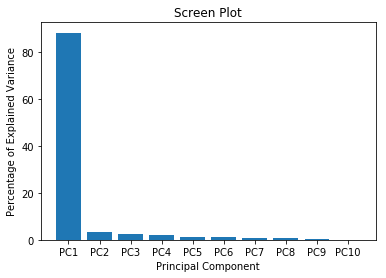

In [52]:
plt.bar(x = range(1,len(per_var)+1),
       height = per_var,
       tick_label = labels)

plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Screen Plot")
plt.show()

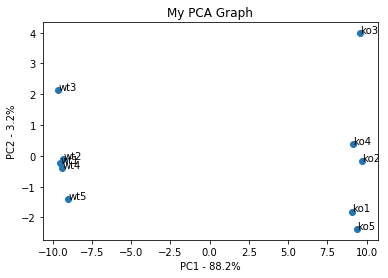

In [53]:
pca_df = pd.DataFrame(pca_data,
                     index = [*wt,*ko],
                     columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,
                (pca_df.PC1.loc[sample],
                pca_df.PC2.loc[sample]))
    
plt.show()

In [56]:
loading_scores = pd.Series(pca.components_[0],
                          index = genes)

sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

top_10_genes = sorted_loading_scores[0:10].index.values

loading_scores[top_10_genes]

gene3     0.106440
gene65   -0.106427
gene51    0.106421
gene16   -0.106420
gene24    0.106402
gene72    0.106402
gene55   -0.106387
gene67   -0.106381
gene95   -0.106363
gene35   -0.106350
dtype: float64

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris_df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [58]:
#removing the "Iris-" thing from denominations.

iris_df = iris_df.replace(to_replace = "Iris-setosa",value = "setosa")
iris_df = iris_df.replace(to_replace = "Iris-versicolor", value = "versicolor")
iris_df = iris_df.replace(to_replace = "Iris-virginica", value = "virginica")

In [59]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


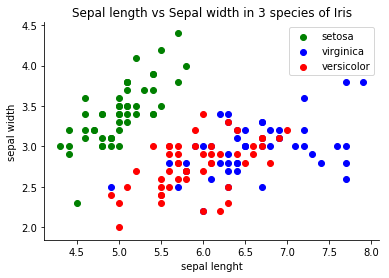

In [76]:
#ook, now trying some plots with matplotlib, to understand how to separate things in pandas dataframe

selection = iris_df[iris_df.target == "setosa"]

plt.scatter(data = selection, 
            x = "sepal length",
            y = "sepal width", color = "g",
            label = "setosa")

plt.scatter(data = iris_df[iris_df.target == "virginica"], 
            x = "sepal length",
            y = "sepal width", color = "b",
           label = "virginica")

plt.scatter(data = iris_df[iris_df.target == "versicolor"], 
            x = "sepal length",
            y = "sepal width", color = "r",
            label = "versicolor")

labels_ = ["sepal lenght","sepal width"]
plt.xlabel(labels_[0])
plt.ylabel(labels_[1])
plt.title("Sepal length vs Sepal width in 3 species of Iris")
plt.legend()
sns.despine()

In [61]:
from sklearn.preprocessing import StandardScaler 

features = ["sepal length","sepal width","petal length","petal width"]

#separeting features and target (supposing I know how the dataset is organized)
x = iris_df.loc[:,features]
y = iris_df.loc[:,"target"]

x = StandardScaler().fit_transform(x) #Scaling all features (mean 0 and σ = 1 ?)



In [62]:
std_iris = pd.DataFrame(data = x, columns = features)
std_iris = std_iris.join(y)
std_iris.head() #standardized iris dataset with target!

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa


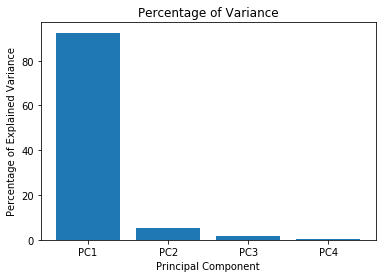

In [63]:
from sklearn.decomposition import PCA

pca = PCA()#object that can be trained from sklearn 

x_scaled = iris_df.loc[:,features] #remove the columns target.

pca.fit(x_scaled)
pca_data = pca.transform(x_scaled)

per_var = np.round(pca.explained_variance_ratio_*100,
                  decimals = 1)

labels = ["PC" + str(i) for i in range(1,len(per_var)+1)] #simple labels



#graph
plt.bar(x = range(1,len(per_var)+1),
       height = per_var,
       tick_label = labels)

plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Percentage of Variance")
plt.show() #the first two components explain over 90% of the dynamic

In [78]:
#now performing a 2 components pca

pca = PCA(n_components = 2) 

principalComponents = pca.fit_transform(x) #don't know what this does 
# documentation says: Fit the model and apply dimensionality reduction.

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2']) #create new df

finalDf = principalDf.join(y)

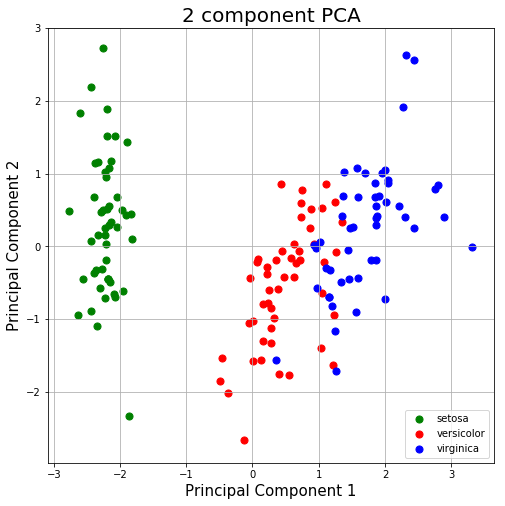

In [72]:
#now visualizing new graph 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['g', 'r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target #nice cycle to graph only the flower I want (foo coloring purpose)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

#unfortunately, I can't really show a 4D graph with all the features D:
#don't like the style, but no will to change it.

In [ ]:
#now I would like to see wich feature is the one that most discriminate the data.

